# 4.2
## 3.

### Imports

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import scikit_posthocs as sp

# Obter série de anos

In [2]:
years = pd.Series([i for i in range(1900, 2021)])

seed_value = 55
sampleyears2 = years.sample(n=12, replace=False, random_state=seed_value)

# Ler os dados

In [3]:
dados_lidos = pd.read_csv("CO_data.csv")

# Obter dados dos anos pretendidos

In [4]:
# Definição das condições de filtragem.
condicao_anos = dados_lidos.year.isin(list(sampleyears2))

# Lista de cores.
cores = list(mcolors.BASE_COLORS.keys())[:5]
# Lista de paises
paises = ["United States", "Russia", "China", "India", "European Union (27)"]

dados_trabalho = {}

for pais in paises:
    condicao_pais = dados_lidos.country == pais
    dados_trabalho[pais] = dados_lidos.loc[condicao_anos & condicao_pais, ["year", "co2"]]

amostras = [dados_trabalho[pais]["co2"] for pais in dados_trabalho]

# Gráficos dos dados

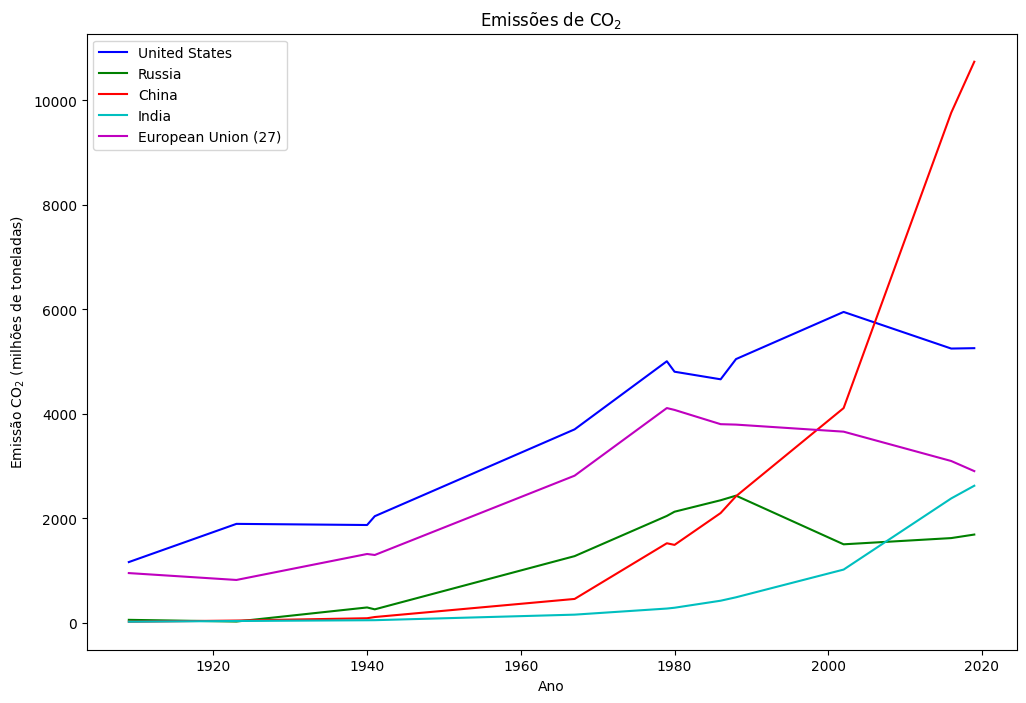

In [5]:
plot_fig, plot_ax = plt.subplots(figsize=(12, 8))

plot_ax.set_title(r"Emissões de CO$_2$")
plot_ax.set_xlabel("Ano")
plot_ax.set_ylabel(r"Emissão CO$_2$ (milhões de toneladas)")

graficos = []

# Construir as várias "linhas"
for idx, pais in enumerate(paises):
    grafico = plot_ax.plot(
        "year",  # Seria a utilizar para o eixo dos XX.
        "co2",  # Seria a utilizar para o eixo dos YY.
        data=dados_trabalho[pais],  # Estrutura de dados a utilizar, neste caso 1 DataFrame. 
        color=cores[idx],  # Cor da "linha".
        label=pais,  # O valor "humano" das etiquetas. 
    )
    # Vou guardar as linhas numa lista caso queira mais tarde referênciar as mesmas.
    graficos.append(grafico)

plot_ax.legend(loc="upper left")

# Boxplot

C:\Users\paulo\AppData\Local\Temp\ipykernel_9284\1795682290.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_bp.show()


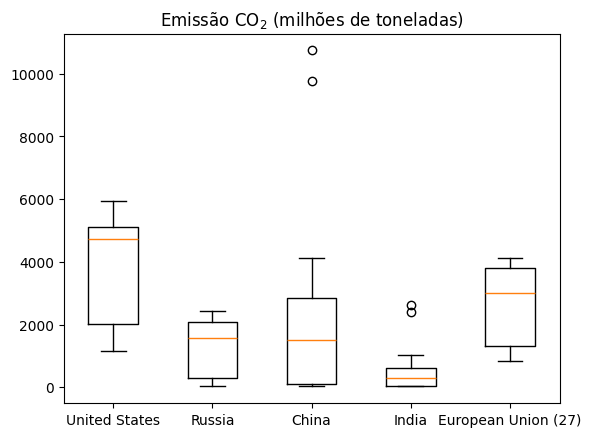

In [6]:
fig_bp, ax_bp = plt.subplots()
boxplot = ax_bp.boxplot(amostras, labels=paises)
ax_bp.set_title(r"Emissão CO$_2$ (milhões de toneladas)")
fig_bp.show()

# Não usar One-Way ANOVA

Não se verificam algumas das condições necessárias:
- Amostras pequenas (12 valores por país);
- A variável dependente (ano) não é continua;
- Condiçao 2 da página 34 do "TestesParametricosPT.pdf" não sei explicar; TODO: explicar
- As observações são relacionadas (mesmos anos);
- Existem *outliers significativos*, nas amostras da China e India;

Assim, considerámos que não se justifica sequer testar a distribuição normal e a homogeneidade das amostras.


# Teste escolhido

Friedman

Várias amostras (mais de 2) emparelhadas (mesmos anos);
A variável aleatória (emissão dde $CO_2$) é quantitativa;

$$H_0: A distribuição das emissões de CO_2 ao longo dos anos observados é igual$$
$$H_1: A distribuiçao das emissões de CO_2 ao longo dos anos observados não é igual$$

*scipy.stats.friedmanchisquare()*

https://datatab.net/tutorial/friedman-test

In [7]:
resultado = stats.friedmanchisquare(*amostras)
print(f"Valor da estatistica: {resultado.statistic:.4}\np-value: {resultado.pvalue:.4e}")

Valor da estatistica: 35.47
p-value: 3.7250e-07


Como o valor de *p-value* é baixo (próximo de 0) rejeitamos a hipótese nula, ou seja as emissões são diferentes. 

# Teste Post Hoc

O teste *post hoc* que vamos usar é o 

In [8]:
sp.posthoc_nemenyi_friedman(a=amostras)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.900000,0.900000,0.900000,0.900000,0.089222,0.114133,0.070093,0.016913,0.030785,0.030785,0.012341
1,0.900000,1.000000,0.900000,0.900000,0.900000,0.142454,0.176713,0.114133,0.030785,0.053714,0.053714,0.022921
2,0.900000,0.900000,1.000000,0.900000,0.900000,0.491760,0.547109,0.432019,0.176713,0.262148,0.262148,0.142454
3,0.900000,0.900000,0.900000,1.000000,0.900000,0.602221,0.657329,0.547109,0.262148,0.370361,0.370361,0.216864
4,0.900000,0.900000,0.900000,0.900000,1.000000,0.900000,0.900000,0.900000,0.657329,0.767552,0.767552,0.602221
5,0.089222,0.142454,0.491760,0.602221,0.900000,1.000000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000
6,0.114133,0.176713,0.547109,0.657329,0.900000,0.900000,1.000000,0.900000,0.900000,0.900000,0.900000,0.900000
7,0.070093,0.114133,0.432019,0.547109,0.900000,0.900000,0.900000,1.000000,0.900000,0.900000,0.900000,0.900000
8,0.016913,0.030785,0.176713,0.262148,0.657329,0.900000,0.900000,0.900000,1.000000,0.900000,0.900000,0.900000
9,0.030785,0.053714,0.262148,0.370361,0.767552,0.900000,0.900000,0.900000,0.900000,1.000000,0.900000,0.900000


In [9]:
sp.posthoc_conover_friedman(a=amostras)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000e+00,7.215461e-01,1.136592e-01,0.054826,0.002356,1.320764e-07,2.424835e-07,7.192510e-08,3.484082e-09,1.165133e-08,1.165133e-08,1.910622e-09
1,7.215461e-01,1.000000e+00,2.159608e-01,0.113659,0.006295,4.448810e-07,8.152405e-07,2.424835e-07,1.165133e-08,3.917789e-08,3.917789e-08,6.365963e-09
2,1.136592e-01,2.159608e-01,1.000000e+00,0.721546,0.113659,2.910084e-05,5.194867e-05,1.620530e-05,8.152405e-07,2.721634e-06,2.721634e-06,4.448810e-07
3,5.482560e-02,1.136592e-01,7.215461e-01,1.000000,0.215961,9.210802e-05,1.620656e-04,5.194867e-05,2.721634e-06,8.977960e-06,8.977960e-06,1.491307e-06
4,2.356351e-03,6.295151e-03,1.136592e-01,0.215961,1.000000,3.879776e-03,6.295151e-03,2.356351e-03,1.620656e-04,4.885123e-04,4.885123e-04,9.210802e-05
5,1.320764e-07,4.448810e-07,2.910084e-05,0.000092,0.003880,1.000000e+00,8.584921e-01,8.584921e-01,2.877676e-01,4.769371e-01,4.769371e-01,2.159608e-01
6,2.424835e-07,8.152405e-07,5.194867e-05,0.000162,0.006295,8.584921e-01,1.000000e+00,7.215461e-01,2.159608e-01,3.747525e-01,3.747525e-01,1.584312e-01
7,7.192510e-08,2.424835e-07,1.620530e-05,0.000052,0.002356,8.584921e-01,7.215461e-01,1.000000e+00,3.747525e-01,5.932693e-01,5.932693e-01,2.877676e-01
8,3.484082e-09,1.165133e-08,8.152405e-07,0.000003,0.000162,2.877676e-01,2.159608e-01,3.747525e-01,1.000000e+00,7.215461e-01,7.215461e-01,8.584921e-01
9,1.165133e-08,3.917789e-08,2.721634e-06,0.000009,0.000489,4.769371e-01,3.747525e-01,5.932693e-01,7.215461e-01,1.000000e+00,1.000000e+00,5.932693e-01


In [10]:
sp.posthoc_siegel_friedman(a=amostras)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.860756,0.429906,0.334663,0.114404,0.002143,0.002864,0.001592,0.000323,0.000625,0.000625,0.000230
1,0.860756,1.000000,0.539255,0.429906,0.160530,0.003800,0.005007,0.002864,0.000625,0.001174,0.001174,0.000451
2,0.429906,0.539255,1.000000,0.860756,0.429906,0.022587,0.028333,0.017882,0.005007,0.008509,0.008509,0.003800
3,0.334663,0.429906,0.860756,1.000000,0.539255,0.035297,0.043671,0.028333,0.008509,0.014059,0.014059,0.006550
4,0.114404,0.160530,0.429906,0.539255,1.000000,0.135962,0.160530,0.114404,0.043671,0.065501,0.065501,0.035297
5,0.002143,0.003800,0.022587,0.035297,0.135962,1.000000,0.930111,0.930111,0.598725,0.725721,0.725721,0.539255
6,0.002864,0.005007,0.028333,0.043671,0.160530,0.930111,1.000000,0.860756,0.539255,0.661003,0.661003,0.482900
7,0.001592,0.002864,0.017882,0.028333,0.114404,0.930111,0.860756,1.000000,0.661003,0.792460,0.792460,0.598725
8,0.000323,0.000625,0.005007,0.008509,0.043671,0.598725,0.539255,0.661003,1.000000,0.860756,0.860756,0.930111
9,0.000625,0.001174,0.008509,0.014059,0.065501,0.725721,0.661003,0.792460,0.860756,1.000000,1.000000,0.792460


In [11]:
sp.posthoc_miller_friedman(a=amostras)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,1.000000,0.999996,0.999965,0.995881,0.582902,0.631832,0.533157,0.297874,0.386610,0.386610,0.257752
1,1.000000,1.000000,1.000000,0.999996,0.998601,0.679194,0.724285,0.631832,0.386610,0.483368,0.483368,0.340965
2,0.999996,1.000000,1.000000,1.000000,0.999996,0.921095,0.940121,0.898217,0.724285,0.805278,0.805278,0.679194
3,0.999965,0.999996,1.000000,1.000000,1.000000,0.955583,0.967848,0.940121,0.805278,0.871303,0.871303,0.766482
4,0.995881,0.998601,0.999996,1.000000,1.000000,0.997546,0.998601,0.995881,0.967848,0.984460,0.984460,0.955583
5,0.582902,0.679194,0.921095,0.955583,0.997546,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.631832,0.724285,0.940121,0.967848,0.998601,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999
7,0.533157,0.631832,0.898217,0.940121,0.995881,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,0.297874,0.386610,0.724285,0.805278,0.967848,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,0.386610,0.483368,0.805278,0.871303,0.984460,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Teste Post Hoc "manual"

In [12]:
for idx in range(5):
    for idz in range(idx):
        stat, p_value = stats.wilcoxon(amostras[idx], amostras[idz])
        print(f'"{paises[idx]}" Vs "{paises[idz]}" => stat: {stat}, p_value, {p_value}')


"Russia" Vs "United States" => stat: 0.0, p_value, 0.00048828125
"China" Vs "United States" => stat: 23.0, p_value, 0.2333984375
"China" Vs "Russia" => stat: 35.0, p_value, 0.791015625
"India" Vs "United States" => stat: 0.0, p_value, 0.00048828125
"India" Vs "Russia" => stat: 14.0, p_value, 0.05224609375
"India" Vs "China" => stat: 0.0, p_value, 0.00048828125
"European Union (27)" Vs "United States" => stat: 0.0, p_value, 0.00048828125
"European Union (27)" Vs "Russia" => stat: 0.0, p_value, 0.00048828125
"European Union (27)" Vs "China" => stat: 24.0, p_value, 0.26611328125
"European Union (27)" Vs "India" => stat: 0.0, p_value, 0.00048828125
